<a href="https://colab.research.google.com/github/Vishwas-Shastry/ANPR/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

from glob import glob
import cv2
import imutils
import torch
import easyocr
import matplotlib.pylab as plt

In [3]:


num_plt_imgs = []
for i in glob('/content/drive/MyDrive/Colab Notebooks/data/*.*'):
    x = cv2.imread(i)
    num_plt_imgs.append(x)


In [4]:
len(num_plt_imgs)

10

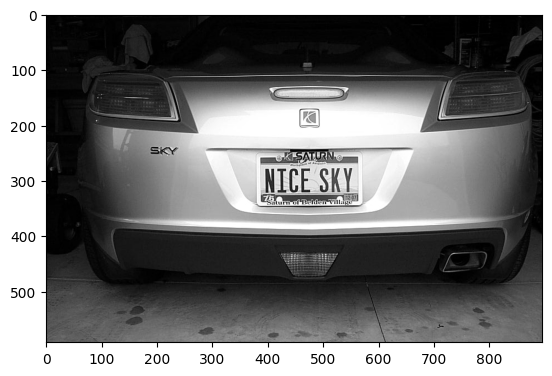

In [5]:
img = num_plt_imgs[6]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

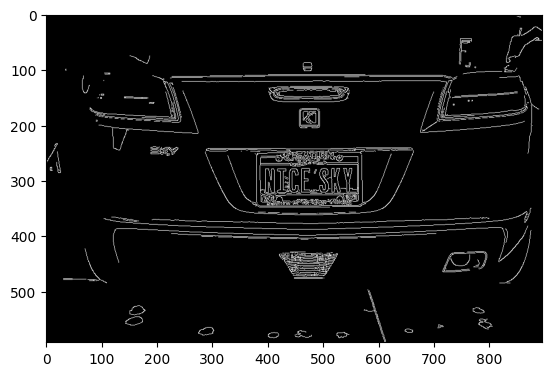

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 50, 150)
plt.imshow(edged, cmap='gray')

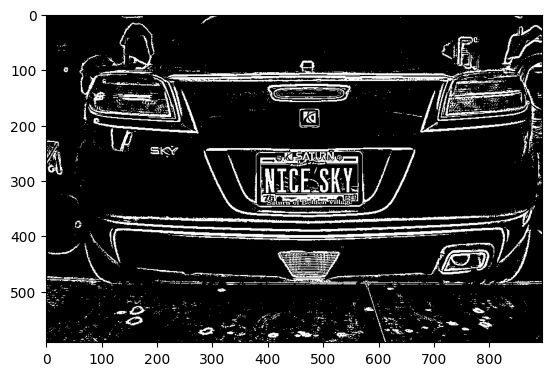

In [7]:
# Apply inverted adaptive Gaussian thresholding
threshold = cv2.adaptiveThreshold(
    bfilter, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)
plt.imshow(threshold, cmap='gray')

In [8]:
keypoints = cv2.findContours(threshold.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:]

In [9]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

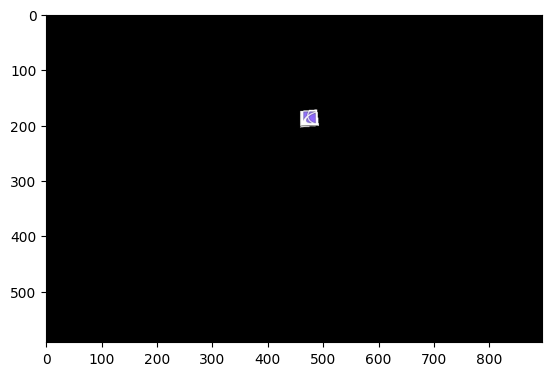

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(new_image, cmap='gray')

In [11]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2 + 1, y1:y2 + 1]

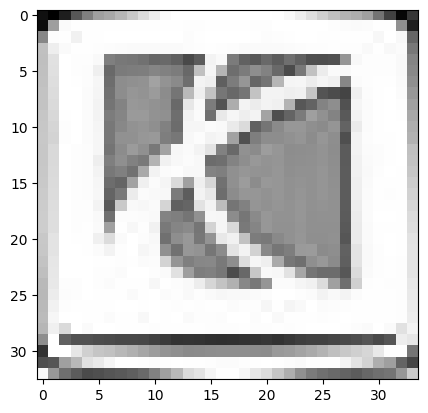

In [12]:
plt.imshow(cropped_image, cmap='gray')

In [26]:

reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[]

In [27]:
text = ' '
for i in range(len(result)):
    text = text + result[i][-2]
text

' '